
<font color="#4633ff"><h2 align="left">Ejercicio Práctico de Aprendizaje Automático</h2></font>
<font color="#6818c2 "><h3 align="left">Proceso realizado paso a paso</h3></font>



En este ejercicio pràctico trabajaremos con una versión modificada del problema [Bank Marketing](http://archive.ics.uci.edu/dataset/222/bank+marketing), consistente en predecir si los clientes de una entidad bancaria contratarán o no un nuevo depósito.

Tienes dos conjuntos de datos disponibles:

- ``bank-transformed-train.csv``, contiene 34921 patrones etiquetados (la columna y es la variable a predecir, que toma los valores yes y no).
- ``bank-transformed-test-no-labels.csv``, contiene 6267 patrones no etiquetados (se ha omitido la columna y).

Los **objetivos generales** de este ejercicio son:

1. Utilizar los datos del primer conjunto para entrenar un modelo de aprendizaje automático que prediga las etiquetas a partir del resto de atributos.

2. Aplicar el modelo a los datos del segundo conjunto para estimar la probabilidad, para cada uno de los patrones, de que su valor en la columna y sea yes.

3. Se adjunta un documento PDF con los correspondientes resultados del anàlisis realizado.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

**Ejercicio 1:** Implementa la función ``load_data(fname)`` que recibe el nombre de un fichero y devuelve los datos contenidos en el fichero como un dataframe de Pandas.

A continuación se muestra un ejemplo de uso.

In [2]:
from pml import load_data

In [3]:
df_entrenamiento = load_data('bank-transformed-train.csv')

In [4]:
df_entrenamiento

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,57,blue-collar,married,professional.course,unknown,no,yes,telephone,2,999,1,unknown,1.4,94.465,-41.8,4.866,5228.1,no
1,31,blue-collar,married,basic,no,no,yes,telephone,4,999,2,unknown,1.1,93.994,-36.4,4.857,5191.0,no
2,39,services,unknown,basic,no,yes,no,cellular,5,999,2,unknown,-0.1,93.200,-42.0,4.076,5195.8,no
3,48,blue-collar,married,basic,no,yes,no,telephone,5,999,0,unknown,1.1,93.994,-36.4,4.864,5191.0,yes
4,37,blue-collar,married,basic,no,no,no,telephone,5,999,2,unknown,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34916,26,services,married,high.school,no,yes,no,cellular,0,999,2,unknown,-1.8,92.893,-46.2,1.299,5099.1,no
34917,27,technician,married,university.degree,no,yes,no,cellular,3,999,1,unknown,-0.1,93.200,-42.0,4.592,5195.8,yes
34918,48,services,married,university.degree,unknown,no,no,cellular,3,999,1,unknown,-1.8,92.893,-46.2,1.291,5099.1,no
34919,36,admin.,married,high.school,no,no,no,telephone,1,999,0,unknown,1.4,94.465,-41.8,4.961,5228.1,no


In [5]:
df_entrenamiento.shape

(34921, 18)

In [6]:
data_test = load_data('bank-transformed-test-no-labels.csv')

In [7]:
data_test.shape

(6267, 17)

In [ ]:
display(data_test)

**Ejercicio 2:** Realiza un análisis exploratorio de los datos e incluye los resultados en el informe. Comenta las transformaciones que consideras necesarias para adaptar los datos de cara a aplicar con éxito los modelos de aprendizaje automático.

**_Anàlisis exploratorio de los datos: bank-transformed-train_**

- **_Paso 1_**: Se realiza una comprobaciòn del tipo de datos con (dtypes) para procesar correctamente los atributos.

In [8]:
#Paso 1
df_entrenamiento.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

-**_Paso 2_**: Detectar valores nulos en el dataframe.

In [ ]:
valores_nulos = df_entrenamiento.isnull()
valores_nulos

In [10]:
cantidad_nulos_por_columna = df_entrenamiento.isnull().sum()
cantidad_nulos_por_columna

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

-**_Paso 3_**: Descripciòn estadistica de los valores numèricos.

In [11]:
df_entrenamiento.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000
mean,40.039260,3.569085,962.268091,0.675009,0.079749,93.575776,-40.514808,3.616485,5166.830600
std,10.522668,3.106812,186.215309,1.223536,1.571477,0.578257,4.627016,1.736832,72.431805
min,15.000000,0.000000,1.000000,-1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,2.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,3.000000,999.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,5.000000,999.000000,2.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,97.000000,58.000000,999.000000,8.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#Creamos un nuevo dataframe con las variables numericas

columnas_rango_1 = df_entrenamiento.iloc[:, [0]]
columnas_rango_2 = df_entrenamiento.iloc[:, 8:11]
columnas_rango_3 = df_entrenamiento.iloc[:, 12:17]
df_entrenamiento_describe = pd.concat([columnas_rango_1, columnas_rango_2, columnas_rango_3], axis=1)

print(df_entrenamiento_describe.head())

   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   57         2    999         1           1.4          94.465   
1   31         4    999         2           1.1          93.994   
2   39         5    999         2          -0.1          93.200   
3   48         5    999         0           1.1          93.994   
4   37         5    999         2           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -41.8      4.866       5228.1  
1          -36.4      4.857       5191.0  
2          -42.0      4.076       5195.8  
3          -36.4      4.864       5191.0  
4          -36.4      4.856       5191.0  


In [13]:
df_entrenamiento_describe

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,57,2,999,1,1.4,94.465,-41.8,4.866,5228.1
1,31,4,999,2,1.1,93.994,-36.4,4.857,5191.0
2,39,5,999,2,-0.1,93.200,-42.0,4.076,5195.8
3,48,5,999,0,1.1,93.994,-36.4,4.864,5191.0
4,37,5,999,2,1.1,93.994,-36.4,4.856,5191.0
...,...,...,...,...,...,...,...,...,...
34916,26,0,999,2,-1.8,92.893,-46.2,1.299,5099.1
34917,27,3,999,1,-0.1,93.200,-42.0,4.592,5195.8
34918,48,3,999,1,-1.8,92.893,-46.2,1.291,5099.1
34919,36,1,999,0,1.4,94.465,-41.8,4.961,5228.1


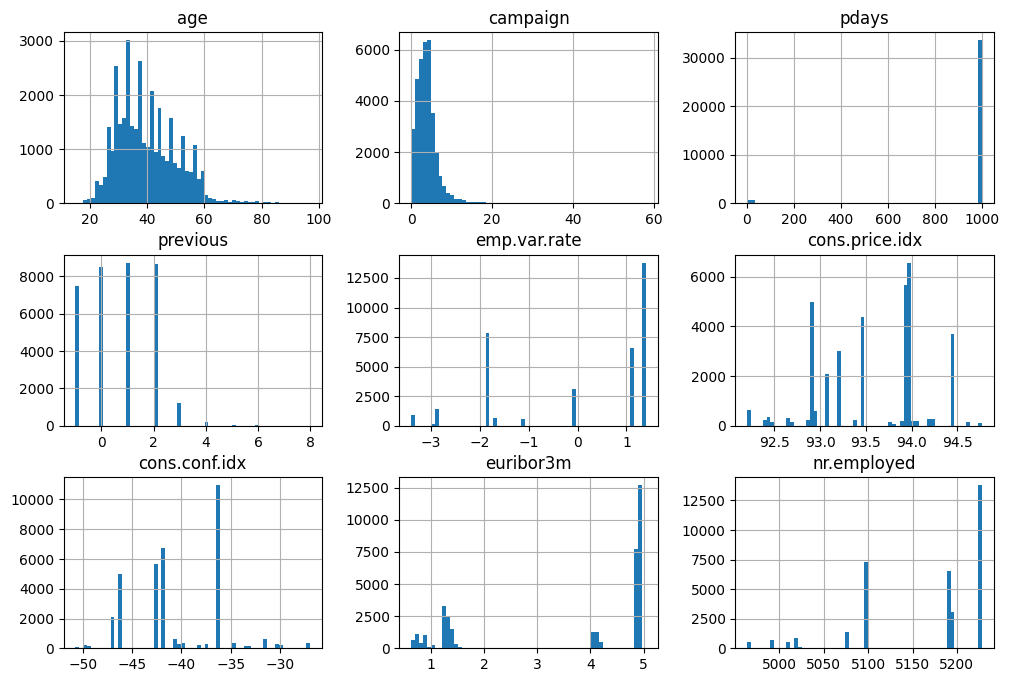

In [60]:
# Visualizaciòn la distribucion de los datos numericos. Figura 1 Ejer.2
df_entrenamiento_describe.hist(bins=60 , figsize=( 12 , 8 ))
plt.show()

In [ ]:
#trazaremos la correlación entre las características.
corr_matrix = df_entrenamiento_describe.corr()
print(corr_matrix)

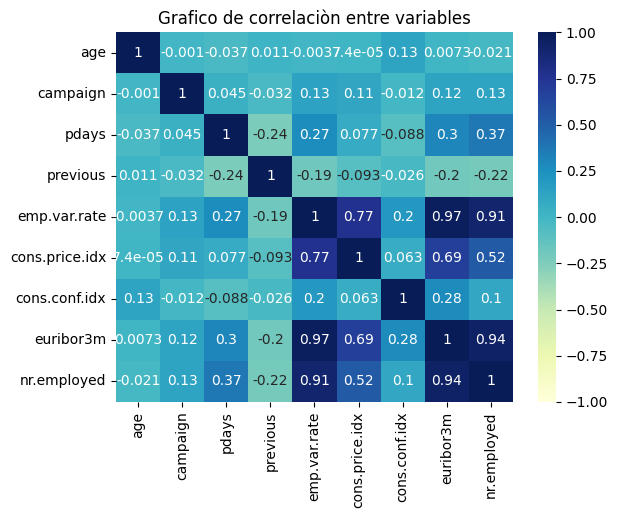

In [16]:
#Graficamos la matriz de correlaciòn.figura 2 ejercicio 2
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu', vmax = 1, vmin =-1)
plt.title('Grafico de correlaciòn entre variables')
plt.show()

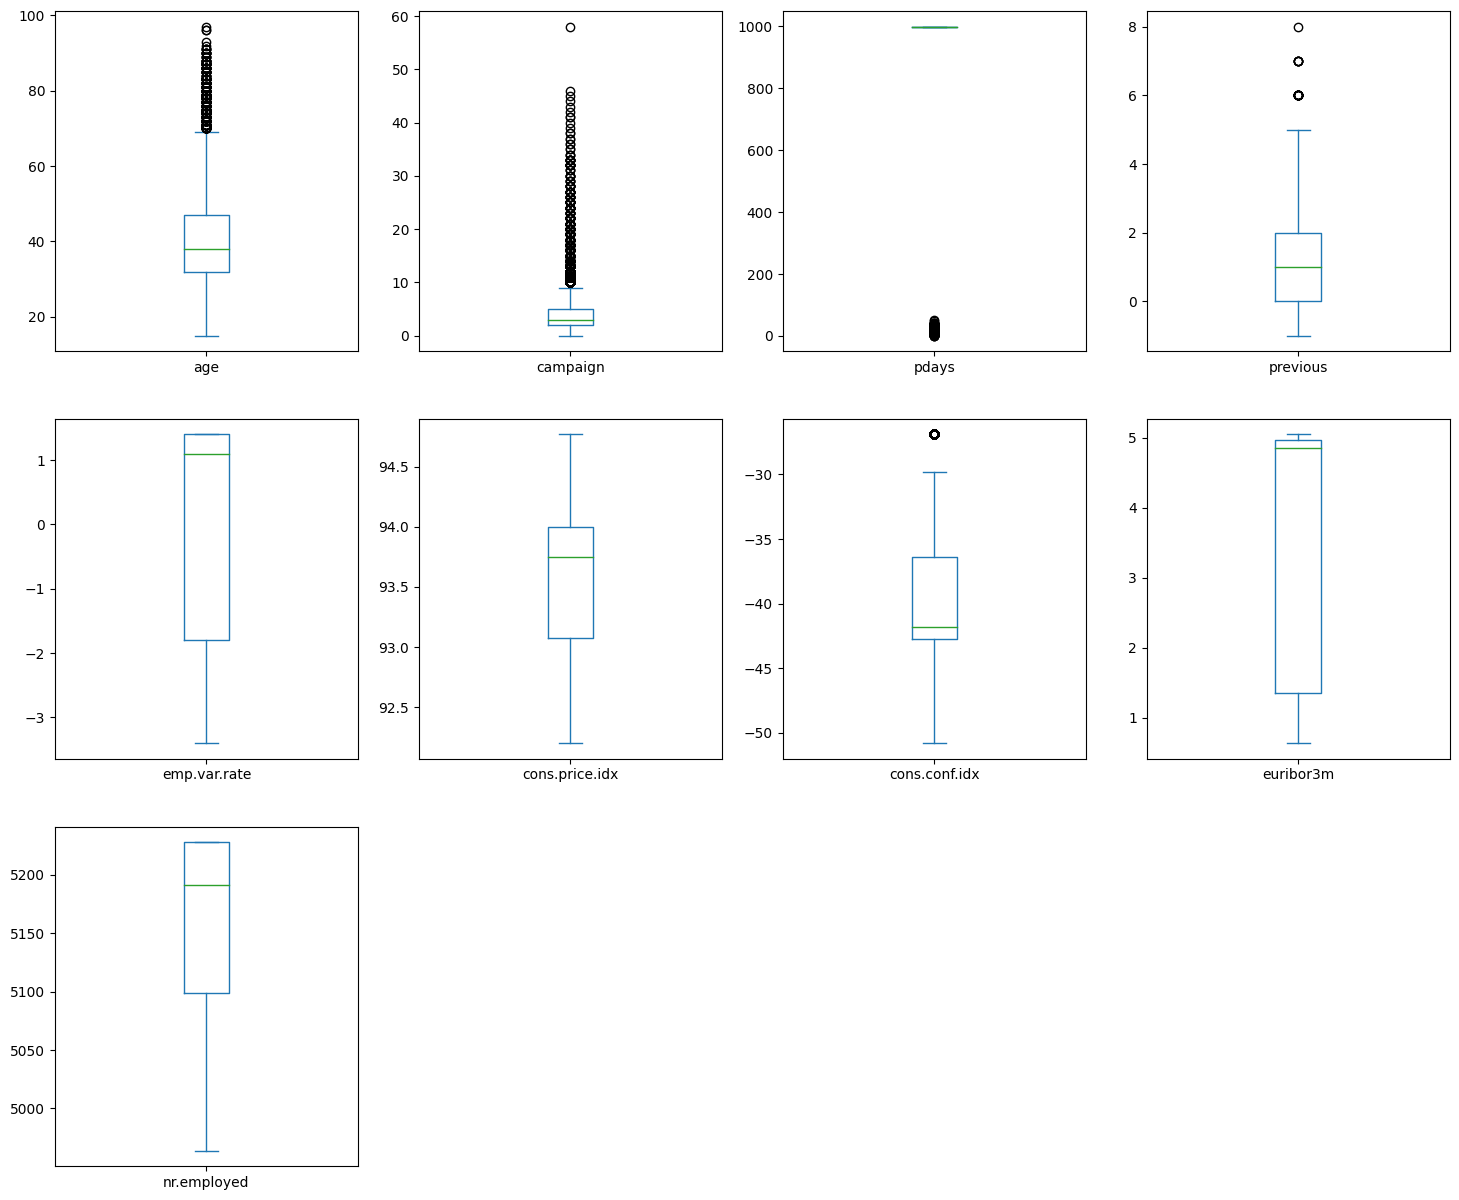

In [17]:
# Detectamos los outliers, figura 3 ejercicio 2
df_entrenamiento_describe.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

- **_Paso 4_** : Anàlisis multivariado de los datos.

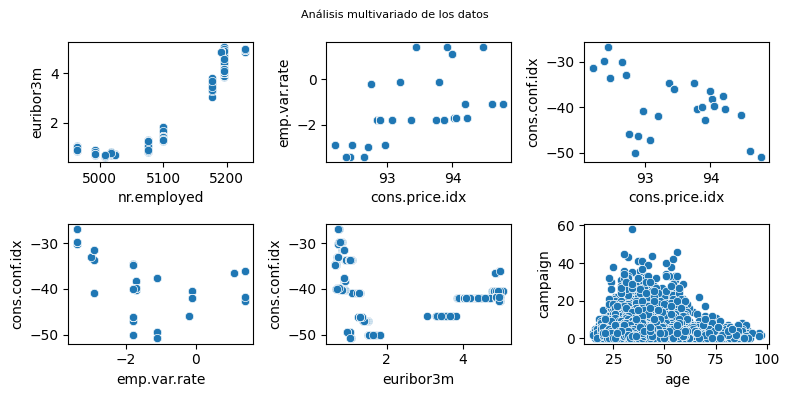

In [18]:
 #Comparamos dos variables numericas con una grafica de dispersiòn.Figura 4 ejercicio 2
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

sns.scatterplot(x="nr.employed", y="euribor3m", data=df_entrenamiento_describe, ax=axes[0, 0])
sns.scatterplot(x="cons.price.idx", y="emp.var.rate", data=df_entrenamiento_describe, ax=axes[0, 1])
sns.scatterplot(x="cons.price.idx", y="cons.conf.idx", data=df_entrenamiento_describe, ax=axes[0, 2])
sns.scatterplot(x="emp.var.rate", y="cons.conf.idx", data=df_entrenamiento_describe, ax=axes[1, 0])
sns.scatterplot(x="euribor3m", y="cons.conf.idx", data=df_entrenamiento_describe, ax=axes[1, 1])
sns.scatterplot(x="age", y="campaign", data=df_entrenamiento_describe, ax=axes[1, 2])
plt.suptitle("Análisis multivariado de los datos", fontsize=8)

plt.tight_layout()
plt.show()

- **_Paso 5_**: Descripciòn de la distribuciòn de cada una de las variables categoricas.figura 5 ejercicio 2

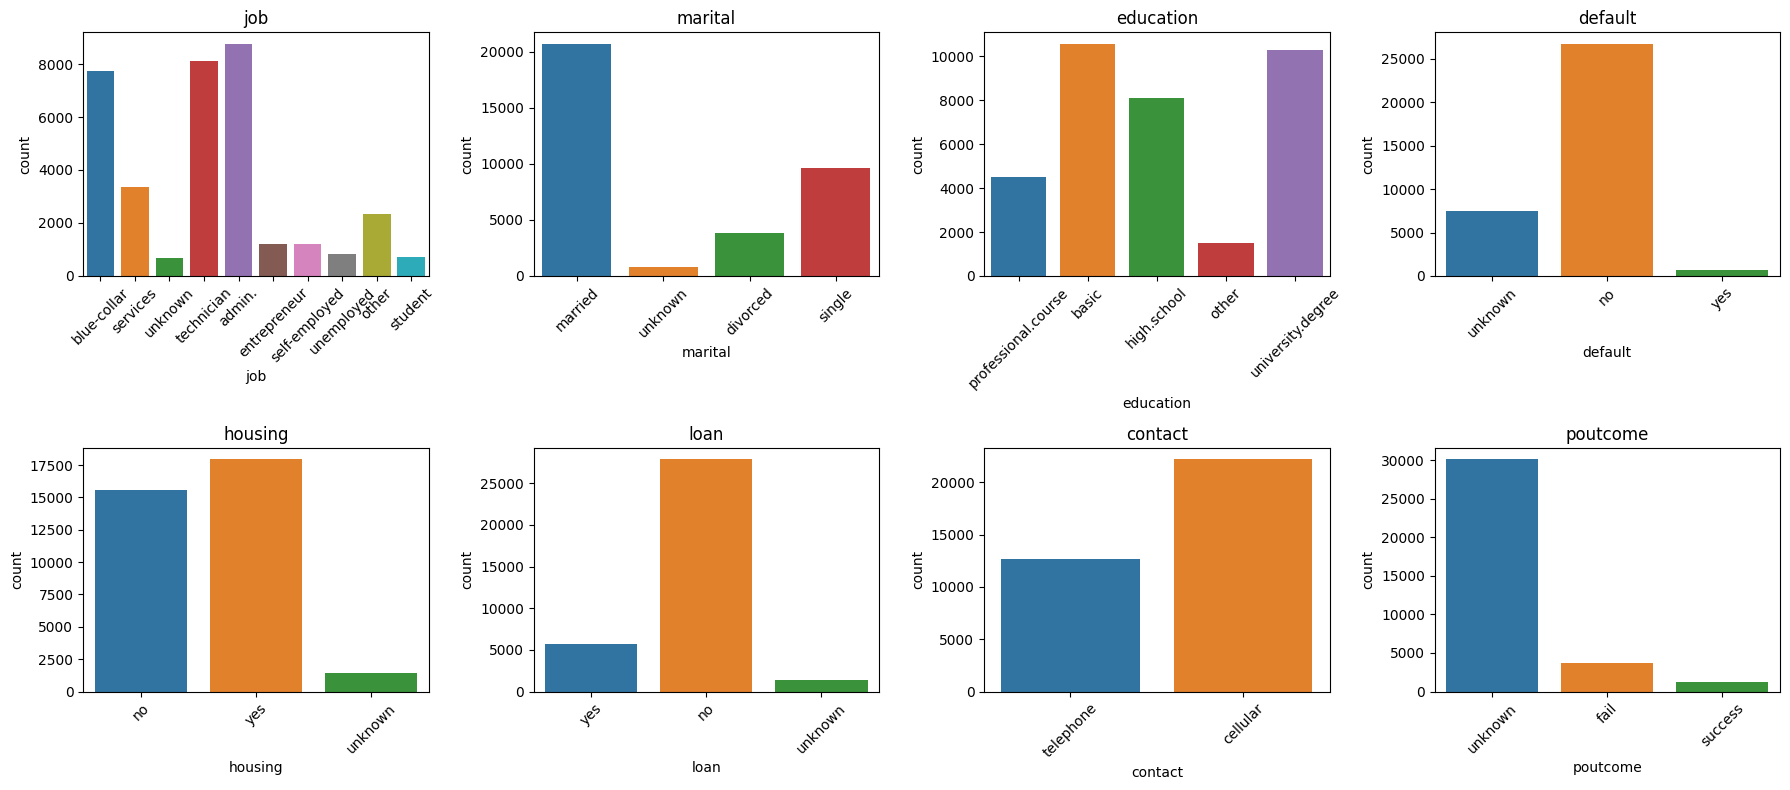

In [19]:
variables_cat1 = ['job', 'marital', 'education', 'default']
variables_cat2 = ['housing', 'loan', 'contact', 'poutcome']

fig, ax = plt.subplots(nrows=2, ncols=len(variables_cat1), figsize=(18, 8))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(variables_cat1):
    sns.countplot(x=col, data=df_entrenamiento, ax=ax[0, i])
    ax[0, i].set_title(col)
    ax[0, i].tick_params(axis='x', labelrotation=45)

for i, col in enumerate(variables_cat2):
    sns.countplot(x=col, data=df_entrenamiento, ax=ax[1, i])
    ax[1, i].set_title(col)
    ax[1, i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


**_Relacion entre variables categoricas_** Figura 6 ejercicio 2

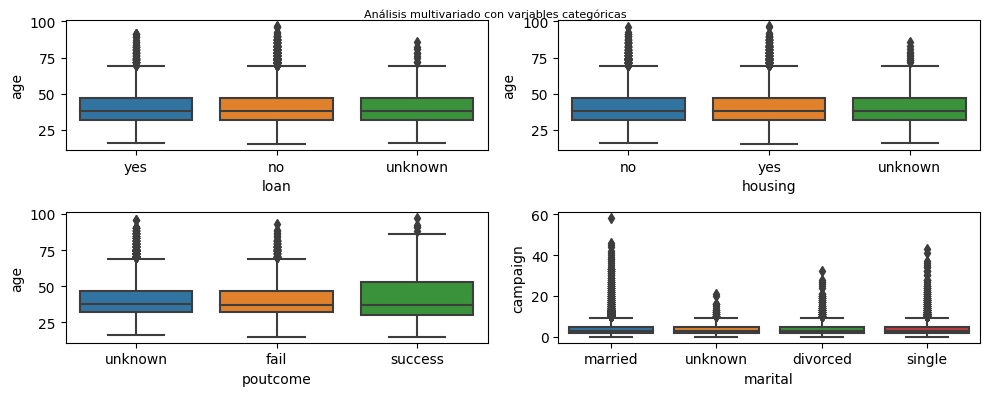

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Boxplot para 'loan'
plt.subplot(221)  # Subplot 1
sns.boxplot(x='loan', y='age', data=df_entrenamiento)

# Boxplot para 'housing'
plt.subplot(222)  # Subplot 2
sns.boxplot(x='housing', y='age', data=df_entrenamiento)

# Boxplot para 'poutcome'
plt.subplot(223)  # Subplot 3
sns.boxplot(x='poutcome', y='age', data=df_entrenamiento)

# Boxplot para 'marital'
plt.subplot(224)  # Subplot 4
sns.boxplot(x='marital', y='campaign', data=df_entrenamiento)

plt.tight_layout()
plt.suptitle("Análisis multivariado con variables categóricas", fontsize=8)
plt.show()


**_Relacion entre variables categoricas_** Figura 7 ejercicio 2

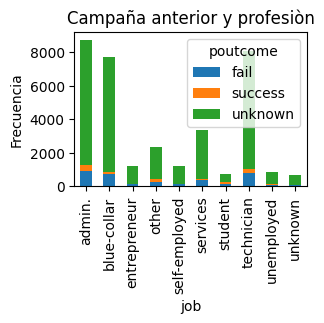

In [21]:
fig, ax = plt.subplots(figsize=(3,2))

cross_tab = pd.crosstab(df_entrenamiento['job'], df_entrenamiento['poutcome'])

cross_tab.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('job')
ax.set_ylabel('Frecuencia')
ax.set_title('Campaña anterior y profesiòn')
ax.legend(title='poutcome')

plt.show()


**_Relacion entre variables categoricas_** Figura 8 ejercicio 2

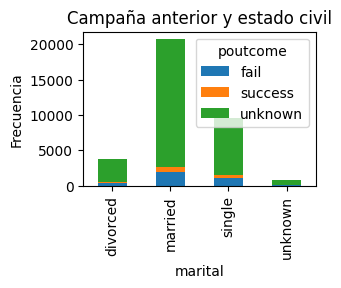

In [22]:
#Relacion entre variables categoricas.
fig, ax = plt.subplots(figsize=(3,2))
cross_tab = pd.crosstab(df_entrenamiento['marital'], df_entrenamiento['poutcome'])

cross_tab.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('marital')
ax.set_ylabel('Frecuencia')
ax.set_title('Campaña anterior y estado civil')
ax.legend(title='poutcome')
plt.show()



**_Relacion entre variables categoricas_** Figura 9 ejercicio 2

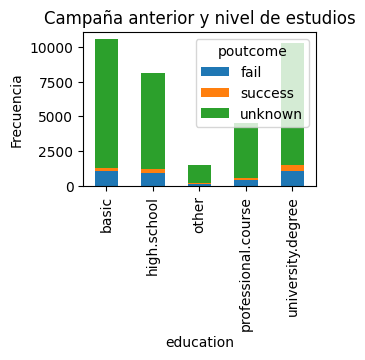

In [23]:
#Relacion entre variables categoricas.
fig, ax = plt.subplots(figsize=(3,2))
cross_tab = pd.crosstab(df_entrenamiento['education'], df_entrenamiento['poutcome'])

cross_tab.plot(kind='bar', stacked=True,  ax=ax)

ax.set_xlabel('education')
ax.set_ylabel('Frecuencia')
ax.set_title('Campaña anterior y nivel de estudios')
ax.legend(title='poutcome')
plt.show()

**_Relacion entre variables categoricas_** Figura 10 ejercicio 2

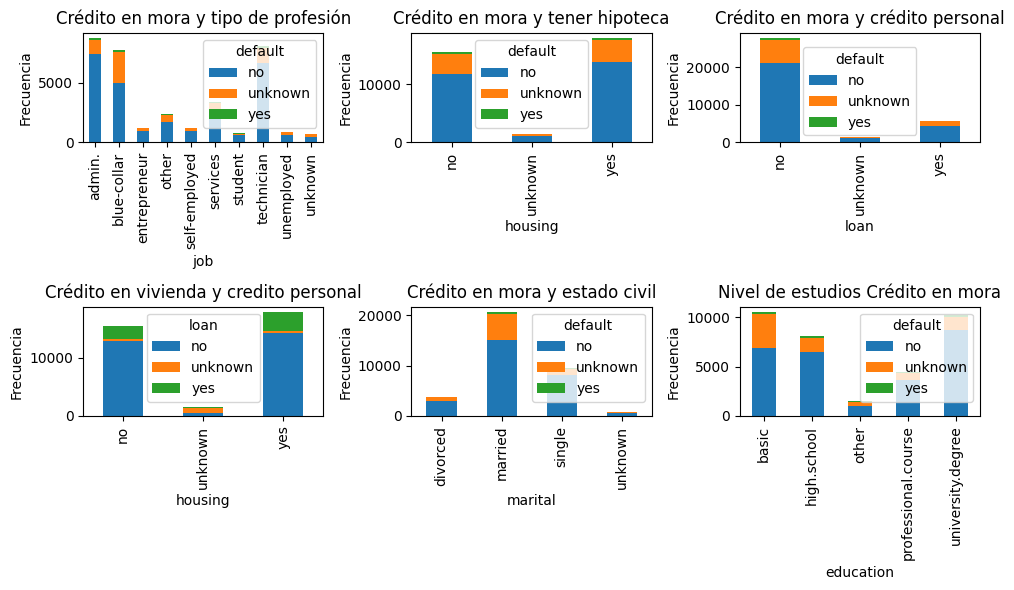

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

cross_tabs = [
    (pd.crosstab(df_entrenamiento['job'], df_entrenamiento['default']), 'job', 'Crédito en mora y tipo de profesión', 'default'),
    (pd.crosstab(df_entrenamiento['housing'], df_entrenamiento['default']), 'housing', 'Crédito en mora y tener hipoteca', 'default'),
    (pd.crosstab(df_entrenamiento['loan'], df_entrenamiento['default']), 'loan', 'Crédito en mora y crédito personal', 'default'),
    (pd.crosstab(df_entrenamiento['housing'], df_entrenamiento['loan']), 'housing', 'Crédito en vivienda y credito personal', 'loan'),
    (pd.crosstab(df_entrenamiento['marital'], df_entrenamiento['default']), 'marital', 'Crédito en mora y estado civil', 'default'),
    (pd.crosstab(df_entrenamiento['education'], df_entrenamiento['default']), 'education','Nivel de estudios Crédito en mora', 'default')
]

for idx, (cross_tab, x_label, title, legend_title) in enumerate(cross_tabs):
    row = idx // 3
    col = idx % 3
    cross_tab.plot(kind='bar', stacked=True, ax=axes[row, col])
    axes[row, col].set_xlabel(x_label)
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].set_title(title)
    axes[row, col].legend(title=legend_title)

plt.tight_layout()
plt.show()


**Ejercicio 3:** Implementa la clase ``DataTransformer`` para transformar los datos del problema.

El constructor no recibirá argumentos (ten en cuenta que las trasnformaciones son específicas para este problema), pero creará los elementos necesarios para realizar la transformación de los datos.

La clase tendrá un método ``prepare_data(self, df, test=False)`` que preparará los datos aplicando las transformaciones que consideres oportunas de acuerdo al análisis realizado en el ejercicio 2 (manejo de outliers y valores ausentes, normalización, cambio de representación de variables, etc.). Los argumentos de la función son:

- Un dataframe, ``df``, con los datos.
- La variable booleana ``test``, que indica si la transformación se debe aplicar a datos de entrenamiento (``test=False``, valor por defecto) o a datos de test (``test=True``). En el primer caso, además de transformar los datos, se almacenarán los elementos necesarios para poder aplicar la misma transformación con posterioridad sobre los datos de test. En el segundo caso se aplicará a los datos la misma transformación realizada (y guardada) en una llamada previa a la función (sobre los datos de entrenamiento).

El método devuelve:

- Si ``test=False``, una tupla ``(x, t)``, donde ``x`` y ``t`` son dos dataframes con los atributos y los targets respectivamente.
- Si ``test=True``, una tupla ``(x, None)``, donde ``x`` es un dataframe con los atributos.

A continuación se muestra un ejemplo de uso.

In [25]:
from pml import DataTransformer

In [26]:
transformer = DataTransformer()
x_train, t_train = transformer.prepare_data(df_entrenamiento)
x_test, _ = transformer.prepare_data(data_test, test=True)

**Ejercicio 4:** Implementa la función ``pca(data, pvar)`` que calcula las componentes principales de los datos contenidos en el dataframe ``data``. La función calcula y devuelve un dataframe con las ``n`` primeras componentes, hasta completar una varianza explicada mayor o igual que ``pvar`` (número entre 0 y 1).  

Se muestra un ejemplo a continuación.

In [27]:
from pml import pca

In [28]:
data_pca = pca(x_train[['emp.var.rate',	'cons.price.idx',	'cons.conf.idx', 'euribor3m']], 0.9)
display(data_pca)

,Componente_1,Componente_2
0,1.665716,-0.739324
1,1.345134,0.616078
2,-0.309946,-0.116501
3,1.347490,0.616164
4,1.344797,0.616066
...,...,...
34916,-2.333920,-0.783673
34917,-0.136248,-0.110174
34918,-2.336613,-0.783771
34919,1.697695,-0.738159


**Ejercio 5:** Construye la función ``feature_importance(x, t, clf, n=None)`` que calcule y devuelva la importancia por permutación de cada variable en el dataframe ``x``. Los argumentos de la función son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf``, entrenado previamente con los datos ``x``, ``t``.
- Un número ``n`` (opcional) que indica el número de variables a devolver.

La función devuelve un dataframe con las importancias por permutación de las ``n`` variables más importantes, ordenadas de mayor a menor. Si ``n`` es ``None`` el dataframe devuelto contendrá todas las variables.

A continuación se muestra un ejemplo.

In [29]:
from pml import feature_importance

In [30]:
dtree = DecisionTreeClassifier(max_depth=7)
dtree = dtree.fit(x_train, t_train)

In [31]:
importance = feature_importance(x_train, t_train, dtree, n=10)
display(importance)

,Feature,Importance
8,cons.conf.idx,0.027806
9,euribor3m,0.021506
26,poutcome_success,0.015807
10,nr.employed,0.012199
5,campaign,0.003608
0,age,0.003150
27,poutcome_unknown,0.001575
1,education,0.001489
18,job_technician,0.000659
3,housing,0.000458


**_Importancia por permutaciòn_** Figura 11 ejercicio 5

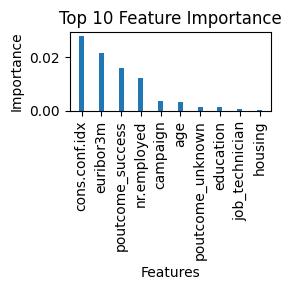

In [32]:
#Figura 11
imp = feature_importance(x_train, t_train, dtree, n=10)

plt.figure(figsize=(3, 3))
bw = 0.25

plt.bar(np.arange(imp.shape[0]),
        imp['Importance'],
        width=bw,
        tick_label=imp['Feature']
       )
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')

plt.tight_layout()
plt.show()


**Ejercicio 6:** Implementa la función ``train_classifier_single_test(x, t, clf, ptest=0.3, seed=None)`` que entrena y evalúa un clasificador utilizando una única partición ``train-test`` de los datos. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf`` no entrenado.
- La fracción ``ptest`` de los datos utilizada como test, por defecto es 0.3.
- Un número ``seed`` (opcional) utilizado para inicializar el generador de números aleatorios y tener resultados reproducibles.

La función realizará una partición de los datos en un conjunto de entrenamiento y uno de test, entrenará el clasificador con los datos de entrenamiento y lo evaluará con los datos de test.

La función debe devolver una tupla ``(strain, stest, clf)``, donde ``strain`` es el *score* obtenido sobre los datos de train, ``stest`` es el *score* obtenido sobre los datos de test y ``clf`` es el clasificador entrenado.

A continuación se muestra un ejemplo.

In [33]:
from pml import train_classifier_single_test

In [34]:
clf = DecisionTreeClassifier(max_depth=7)
train_classifier_single_test(x_train, t_train, clf)

(0.9073392243495336, 0.8980624224491743, DecisionTreeClassifier(max_depth=7))

**Ejercicio 7:** Implementa la función ``train_classifier_nfold_val(x, t, clf, nfolds=5, seed=None)`` que entrena y evalúa un clasificador utilizando validación cruzada. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf`` no entrenado.
- El número de pliegues ``nfolds`` a utilizar, que por defecto es 5.
- Un número ``seed`` (opcional) utilizado para inicializar el generador de números aleatorios y tener resultados reproducibles.

La función realizará una validación cruzada de ``nfold`` pliegues. Para generar los índices de entrenamiento y validación en cada uno de los pliegues es recomendable utilizar la clase [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) de Scikit-Learn.

La función debe devolver una lista de ``nfolds`` tuplas (una por cada pliegue). Cada tupla será de la forma ``(strain, sval, clf)``, donde ``strain`` y ``sval`` son los *scores* obtenidos sobre los datos de train y validación de cada pliegue, y ``clf`` es el clasificador correspondiente.

A continuación se muestra un ejemplo.

In [35]:
from pml import train_classifier_nfold_val

In [36]:
clf = LogisticRegression(max_iter=1000)
res = train_classifier_nfold_val(x_train, t_train, clf)
res

[(0.8992339633447881, 0.9000715819613457, LogisticRegression(max_iter=1000)),
 (0.8993449547195476, 0.900057273768614, LogisticRegression(max_iter=1000)),
 (0.8992375702473422, 0.8999140893470791, LogisticRegression(max_iter=1000)),
 (0.8994165443676845, 0.8997709049255441, LogisticRegression(max_iter=1000)),
 (0.9000966460249847, 0.8969072164948454, LogisticRegression(max_iter=1000))]

**Ejercicio 8:** Implementa la función ``fit_hyperparams(x, t, models, nfolds=5, seed=None)`` que entrena y evalúa un conjunto de clasificadores utilizando validación cruzada. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Una lista ``models`` de clasificadores no entrenados.
- El número de pliegues ``nfolds`` a utilizar, por defecto es 5.
- Un número ``seed`` (opcional) utilizado para inicializar el generador de números aleatorios y tener resultados reproducibles.

La función llamará a la función ``train_classifier_nfold_val`` del ejercicio 7 con cada clasificador de la lista ``models``, y seleccionará el que tenga un mejor score promedio en validación.
El mejor modelo se reentrenará utilizando todos los datos diponibles ``(x, t)``.

La función debe devolver la tupla ``(best_model, res)``, donde ``best_model`` es el mejor clasificador (reentrenado con todos los datos) y ``res`` es una lista de tuplas de la forma ``(clf, mean_score)``, donde ``clf`` es cada uno de los clasificadores en la lista ``models`` y ``mean_score`` es el score promedio obtinido por ese clasificador sobre todos los conjuntos de validación.

A continuación se muestra un ejemplo.

In [37]:
from pml import fit_hyperparams

In [38]:
from sklearn.ensemble import RandomForestClassifier
n_classifiers = 501
max_depth = 5

clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_classifiers)

# Entrenamiento usando fit_hyperparams
models = [clf]
clf, res = fit_hyperparams(x_train, t_train, models, nfolds=5, seed=127)

print(clf)
print(res)


RandomForestClassifier(max_depth=5, n_estimators=501)
[(RandomForestClassifier(max_depth=5, n_estimators=501), 0.899544732986165)]


In [39]:
models = [LogisticRegression(C=c, max_iter=1000) for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]]
clf, res = fit_hyperparams(x_train, t_train, models, nfolds=5, seed=127)
print(clf)
print(res)

LogisticRegression(C=10.0, max_iter=1000)
[(LogisticRegression(C=0.0001, max_iter=1000), 0.8882334424691759), (LogisticRegression(C=0.001, max_iter=1000), 0.889951589931296), (LogisticRegression(C=0.01, max_iter=1000), 0.8992583723426325), (LogisticRegression(C=0.1, max_iter=1000), 0.899544745285471), (LogisticRegression(max_iter=1000), 0.899544745285471), (LogisticRegression(C=10.0, max_iter=1000), 0.899573382169778)]


**Ejercicio 9:** Implementa la función ``def get_metrics(x, t, clf, target_class=1)`` que devuelve un conjunto de métricas de evaluación para el clasificador ``clf`` sobre los datos ``x``, ``t``. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf`` previamente entrenado.
- La clase objetivo, ``target_class``, que por defecto es la clase 1 (yes).

La función debe devolver la tupla ``(score, cmatrix, fpr, tpr, roc_auc, precision, recall, ap)``, donde:

- ``score`` es el score.
- ``cmatrix`` es la matriz de confusión.
- ``fpr`` es el false positive rate.
- ``tpr`` es el true positive rate.
- ``roc_auc`` es el área bajo la curva ROC.
- ``precision`` es la precisión.
- ``recall`` es el recall.
- ``ap`` es la average precision.

A continuación se muestra un ejemplo.

In [40]:
target_class= df_entrenamiento['y'].replace({'no': 0, 'yes': 1})

target_class

0        0
1        0
2        0
3        1
4        0
        ..
34916    0
34917    1
34918    0
34919    0
34920    0
Name: y, Length: 34921, dtype: int64

In [41]:
clf = LogisticRegression(max_iter=1000)

In [42]:
clf.fit(x_train, t_train)

LogisticRegression(max_iter=1000)

In [47]:
clf = DecisionTreeClassifier(max_depth=7)

In [48]:
clf.fit(x_train, t_train)

DecisionTreeClassifier(max_depth=7)

In [44]:
from pml import get_metrics

In [49]:
score, cmatrix, fpr, tpr, roc_auc, precision, recall, ap = get_metrics(x_train, t_train, clf, target_class=1)
print(f"score = {score}")
print("Confusion matrix:")
print(cmatrix)
#print(fpr)
#print(tpr)
#print(fpr)
#print(roc_auc)
#print(precision)


score = 0.9063314338077375
Confusion matrix:
[[30565   453]
 [ 2818  1085]]


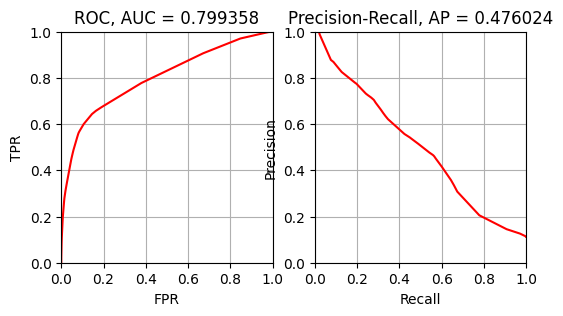

In [50]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, AUC = %f" % roc_auc)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall, AP = %f" % ap)
plt.show()

*Nota:* Ten en cuenta que las métricas anteriores las estamos obteniendo sobre el conjunto de entrenamiento. Sería interesante separar de estos datos un conjunto de test y obtener las métricas sobre este último.

In [51]:
# Separamos en dos conjuntos, training y test: ahora hacemos el entrenamiento con  conjunto de test
from sklearn.model_selection import train_test_split
x_entre, x_ev, t_entre, t_ev = train_test_split(x_train, t_train, test_size= 0.3, random_state= 142)

In [52]:
num_train = t_entre.shape[0]
num_test = t_ev.shape[0]
print(num_train)
print(t_entre.value_counts())
print(t_entre.value_counts()/num_train)

24444
0    21681
1     2763
Name: y, dtype: int64
0    0.886966
1    0.113034
Name: y, dtype: float64


In [53]:
clf = LogisticRegression(max_iter=1000)

In [54]:
clf.fit(x_ev, t_ev )

LogisticRegression(max_iter=1000)

In [ ]:
clf = DecisionTreeClassifier(max_depth=7)

In [ ]:
clf.fit(x_ev, t_ev )

In [55]:
score, cmatrix, fpr, tpr, roc_auc, precision, recall, ap = get_metrics(x_ev, t_ev, clf, target_class=1)
print(f"score = {score}")
print("Confusion matrix:")
print(cmatrix)
print(fpr)
print(tpr)
print(fpr)
print(roc_auc)
print(precision)

score = 0.8993032356590627
Confusion matrix:
[[9222  115]
 [ 940  200]]
[0.00000000e+00 1.07100782e-04 1.07100782e-04 ... 9.94752062e-01
 9.94752062e-01 1.00000000e+00]
[0.         0.         0.00350877 ... 0.99912281 1.         1.        ]
[0.00000000e+00 1.07100782e-04 1.07100782e-04 ... 9.94752062e-01
 9.94752062e-01 1.00000000e+00]
0.7849266453592479
[0.10880977 0.10882016 0.10883055 ... 0.5        0.         1.        ]


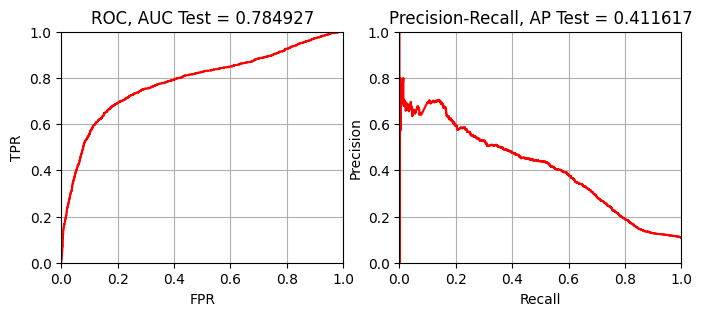

In [56]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, AUC Test = %f" % roc_auc)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall, AP Test = %f" % ap)
plt.show()

**Ejercicio 10:** Implementa la función ``predict_test(clf, x, fname)`` que aplica el clasificador ``clf`` a los datos de test ``x`` y escribe en el fichero ``fname`` las probabilidades asignadas a la clase 1 (yes). La función devuelve un dataframe con estas probabilidades.

A continuación se muestra un ejemplo de aplicación sobre los datos de test del fichero ``bank-transformed-test-no-labels.csv``. El orden de los datos en el fichero se debe conservar.



In [57]:
from pml import predict_test

**Ejercicio 11:** Utiliza las funciones anteriores, y posiblemente otras que consideres necesarias, para estimar las probabilidades de clase 1 (yes) de todos los puntos contenidos en el fichero ``bank-transformed-test-no-labels.csv``. Guarda estas probabilidades en un fichero con nombre ``predictions.csv`` e inclúyelo como parte de la entrega. El orden del fichero no se debe alterar.

A modo de ejemplo se facilita el fichero ``random_predictions.csv`` que muestra la estructura esperada.

**_Estimaciòn de probabilidades  de la clase 1 (yes)_**

In [ ]:
x_test = transformer.prepare_data(data_test, test=True)

In [58]:
clf = LogisticRegression(C=10.0, max_iter=1000)
clf.fit(x_train, t_train)

LogisticRegression(C=10.0, max_iter=1000)

In [59]:
predict_test(clf, x_test, 'predictions.csv')

,Probability_yes
0,0.727619
1,0.033788
2,0.050608
3,0.040748
4,0.189251
...,...
6262,0.215333
6263,0.041212
6264,0.225971
6265,0.048235


**Conclusiones finales en archivo PDF adjunto